**House Sales in King County, USA**

# Business Understanding

In [304]:
reset -sf

# Data Mining

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

In [306]:
path = './data/house_price.csv'
df = pd.read_csv(path, index_col='id')

In [307]:
print('# of rows:',df.shape[0])
print('# of cols:',df.shape[1])
df.sample(2)

# of rows: 21597
# of cols: 20


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
8856000545   5/7/2014  100000.0         2        1.0          910     22000   
7896300592  1/14/2015  303500.0         6        4.5         3390      7200   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
8856000545     1.0         0.0   0.0          3      6         910   
7896300592     2.0         0.0   0.0          3      8        2440   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
8856000545           0.0      1956           0.0    98001  47.2777 -122.252   
7896300592         950.0      2007           0.0    98118  47.5205 -122.288   

            sqft_living15  sqft_lot15  
id                                     
8856000545           1326        9891  
7896300592           2040        7214

## Data Splitting

In [308]:
print('# of rows:',df.shape[0])
print('# of cols:',df.shape[1])
df.sample(2)

# of rows: 21597
# of cols: 20


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
114100314   3/18/2015  285000.0         3       1.50         1480      7117   
2144800117  6/26/2014  270000.0         4       2.25         2600      9900   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
114100314      1.0         0.0   0.0          3      7        1170   
2144800117     1.0         0.0   0.0          3      7        1600   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
114100314          310.0      1960           0.0    98028  47.7766 -122.248   
2144800117        1000.0      1965           0.0    98178  47.4881 -122.237   

            sqft_living15  sqft_lot15  
id                                     
114100314            2230       14775  
2144800117           1770       11250

## First Glance

In [309]:
df.sample(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
8944750480  1/30/2015  359000.0         3       2.25         1990      4331   
2314300420  9/16/2014  400000.0         4       2.50         2150      5397   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
8944750480     2.0         0.0   0.0          3      7        1990   
2314300420     2.0         0.0   0.0          3      8        2150   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
8944750480           0.0      1997           0.0    98056  47.4917 -122.167   
2314300420           0.0      1998           0.0    98058  47.4644 -122.151   

            sqft_living15  sqft_lot15  
id                                     
8944750480           1690        3688  
2314300420           2260        5080

In [310]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Column Name Description**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

## Missing Data and Data Type

In [311]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

In [312]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Why is ` df['sqft_basement']` an object? 

In [313]:
print('df.sqft_basement DataType before change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType before change:  object


In [314]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
for row in df['sqft_basement']:
    if not is_float(row):
        print(row) 
# move output to set to elminate doubles 

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


## Replace `?` in ` df['sqft_basement']` 

In [315]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [316]:
print(f'df.sqft_basement DataType after change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType after change:  float64


## replace `NaN`in `df.view` with `0`

In [317]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

In [318]:
df.view = df.view.fillna(0)

## replace `NaN`in `df.waterfront` with `0`

In [319]:
df.waterfront = df.waterfront.fillna(0)

In [320]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
sqft_basement     454         2.1
yr_renovated     3842        17.8

## replace `0` in `df.yr_renovated` with Na

In [321]:
df.yr_renovated.hist()

<AxesSubplot:>

In [322]:
df.yr_renovated.replace(0, np.nan, inplace=True)
#df.yr_renovated.fillna(0, inplace = True)
#df.yr_renovated = df.yr_renovated.astype('int64', error='ignore')

In [323]:
df.yr_renovated.hist()

<AxesSubplot:>

## dtype(object) --> dtype(date)

In [324]:
var = 'date'
print(f'df.{var} DataType before change: ',  df[var].dtypes)

df.date DataType before change:  object


In [325]:
df.date.head(5)

id
7129300520    10/13/2014
6414100192     12/9/2014
5631500400     2/25/2015
2487200875     12/9/2014
1954400510     2/18/2015
Name: date, dtype: object

In [326]:
var = 'date'
df[var] = pd.to_datetime(df[var], errors='coerce', yearfirst=True)

In [327]:
df.date.head(2)

id
7129300520   2014-10-13
6414100192   2014-12-09
Name: date, dtype: datetime64[ns]

In [328]:
var = 'date'
print(f'df.{var} DataType after change: ',  df[var].dtypes)

df.date DataType after change:  datetime64[ns]


# Data Explo

## Categorical / Continious Data

In [329]:
def get_uniques(df, limit): 
    colm_lst = list(df.columns)
    print(' --- overview categorical Values ---  \n ')
    for colm in colm_lst: 
        if df[str(colm)].nunique() < limit: 
            print(f'{colm}: # of unique data:', df[str(colm)].nunique())
            print(f'{colm}: unique values: {df[str(colm)].unique()}  \n') 
            

get_uniques(df, 99)

 --- overview categorical Values ---  
 
bedrooms: # of unique data: 12
bedrooms: unique values: [ 3  2  4  5  1  6  7  8  9 11 10 33]  

bathrooms: # of unique data: 29
bathrooms: unique values: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]  

floors: # of unique data: 6
floors: unique values: [1.  2.  1.5 3.  2.5 3.5]  

waterfront: # of unique data: 2
waterfront: unique values: [0. 1.]  

view: # of unique data: 5
view: unique values: [0. 3. 4. 2. 1.]  

condition: # of unique data: 5
condition: unique values: [3 5 4 1 2]  

grade: # of unique data: 11
grade: unique values: [ 7  6  8 11  9  5 10 12  4  3 13]  

yr_renovated: # of unique data: 69
yr_renovated: unique values: [  nan 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971

In [330]:
colm_lst = list(df.columns)
continuous_var = [colm for colm in colm_lst if df[str(colm)].nunique() > 71]
continuous_var.append('yr_renovated')
continuous_var.append('floors')

print(len(continuous_var))
continuous_var

13


['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

In [331]:
categorical_var = [colm for colm in colm_lst if df[str(colm)].nunique() < 71]

categorical_var.remove('yr_renovated')
categorical_var.remove('floors')

print(len(categorical_var))
categorical_var

7


['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [332]:
def check_missing(df,categorical_var,  continuous_var): 
    lst =  [col for col in list(df.columns) if (col not in categorical_var) and (col not in continuous_var)]
    if len(lst) > 0: 
        return lst
    else: 
        return print('non missing')
    
check_missing(df,categorical_var,  continuous_var)

non missing


## visual inspection

### Correlation Heatmap

In [333]:
round(df.corr(), 2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           1.00      0.31       0.53         0.70      0.09    0.26   
bedrooms        0.31      1.00       0.51         0.58      0.03    0.18   
bathrooms       0.53      0.51       1.00         0.76      0.09    0.50   
sqft_living     0.70      0.58       0.76         1.00      0.17    0.35   
sqft_lot        0.09      0.03       0.09         0.17      1.00   -0.00   
floors          0.26      0.18       0.50         0.35     -0.00    1.00   
waterfront      0.26     -0.00       0.06         0.10      0.02    0.02   
view            0.39      0.08       0.19         0.28      0.08    0.03   
condition       0.04      0.03      -0.13        -0.06     -0.01   -0.26   
grade           0.67      0.36       0.67         0.76      0.11    0.46   
sqft_above      0.61      0.48       0.69         0.88      0.18    0.52   
sqft_basement   0.33      0.30       0.28         0.43      0.02   -0.25   
yr_built        0.05      0.16       0.51         0.32      0.05    0.49   
yr_renovated    0.13      0.16       0.25         0.13     -0.08    0.06   
zipcode        -0.05     -0.15      -0.20        -0.20     -0.13   -0.06   
lat             0.31     -0.01       0.02         0.05     -0.09    0.05   
long            0.02      0.13       0.22         0.24      0.23    0.13   
sqft_living15   0.59      0.39       0.57         0.76      0.14    0.28   
sqft_lot15      0.08      0.03       0.09         0.18      0.72   -0.01   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
price                0.26  0.39       0.04   0.67        0.61           0.33   
bedrooms            -0.00  0.08       0.03   0.36        0.48           0.30   
bathrooms            0.06  0.19      -0.13   0.67        0.69           0.28   
sqft_living          0.10  0.28      -0.06   0.76        0.88           0.43   
sqft_lot             0.02  0.08      -0.01   0.11        0.18           0.02   
floors               0.02  0.03      -0.26   0.46        0.52          -0.25   
waterfront           1.00  0.38       0.02   0.08        0.07           0.08   
view                 0.38  1.00       0.05   0.25        0.17           0.28   
condition            0.02  0.05       1.00  -0.15       -0.16           0.17   
grade                0.08  0.25      -0.15   1.00        0.76           0.17   
sqft_above           0.07  0.17      -0.16   0.76        1.00          -0.05   
sqft_basement        0.08  0.28       0.17   0.17       -0.05           1.00   
yr_built            -0.02 -0.05      -0.36   0.45        0.42          -0.13   
yr_renovated        -0.09 -0.06      -0.36   0.24        0.05           0.18   
zipcode              0.03  0.09       0.00  -0.19       -0.26           0.08   
lat                 -0.01  0.01      -0.02   0.11       -0.00           0.11   
long                -0.04 -0.08      -0.11   0.20        0.34          -0.15   
sqft_living15        0.08  0.28      -0.09   0.71        0.73           0.20   
sqft_lot15           0.03  0.07      -0.00   0.12        0.20           0.02   

               yr_built  yr_renovated  zipcode   lat  long  sqft_living15  \
price              0.05          0.13    -0.05  0.31  0.02           0.59   
bedrooms           0.16          0.16    -0.15 -0.01  0.13           0.39   
bathrooms          0.51          0.25    -0.20  0.02  0.22           0.57   
sqft_living        0.32          0.13    -0.20  0.05  0.24           0.76   
sqft_lot           0.05         -0.08    -0.13 -0.09  0.23           0.14   
floors             0.49          0.06    -0.06  0.05  0.13           0.28   
waterfront        -0.02         -0.09     0.03 -0.01 -0.04           0.08   
view              -0.05         -0.06     0.09  0.01 -0.08           0.28   
condition         -0.36         -0.36     0.00 -0.02 -0.11          -0.09   
grade              0.45          0.24    -0.19  0.11  0.20           0.71   
sqft_above         0.42          0.05    -0.26

In [334]:
pd.DataFrame(abs(df.corr()) > 0.5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False       True         True     False   False   
bedrooms       False      True       True         True     False   False   
bathrooms       True      True       True         True     False    True   
sqft_living     True      True       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False       True        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade           True     False       True         True     False   False   
sqft_above      True     False       True         True     False    True   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False       True        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15   True     False       True         True     False   False   
sqft_lot15     False     False      False        False      True   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False   True        True          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False   True        True          False   
sqft_living         False  False      False   True        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False        True          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True        True          False   
sqft_above          False  False      False   True        True          False   
sqft_basement       False  False      False  False       False           True   
yr_built            False  False      False  False       False          False   
yr_renovated        False  False      False  False       False          False   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False   True        True          False   
sqft_lot15          False  False      False  False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
price             False         False    False  False  False           True   
bedrooms          False         False    False  False  False          False   
bathrooms          True         False    False  False  False           True   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         False    False  False  False           True   
sqft

#### Note: 
- price only has three 'strong' correlations: sqft_living, grade, sqft_above

In [335]:
sns.set(style="white")

corr = df.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(22, 22,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=1, vmin=-1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')
#plt.savefig('correlation2.png')

Text(0.5, 1.0, 'Multi-Collinearity of Features')

## Mapping Data

In [336]:
df.plot(kind="scatter", x="long", c="price", y="lat", figsize=(10, 8), 
             cmap="gist_heat_r", colorbar=True, title="Price / Location Indication");
plt.show();

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attrib

In [337]:

fig = px.scatter(df, x="long", y="lat", 
                 color="price", 
                 hover_data=['price'],
                 title="Price / Location Indication")

fig.show()

In [338]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [339]:
#documentation: https://plotly.com/python/reference/densitymapbox/
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='waterfront', radius=2,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.2, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

## scatter plots

In [340]:
df.hist(figsize=(12,12));

In [341]:
inspect = ['bedrooms', 'bathrooms', 'floors', 'zipcode']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

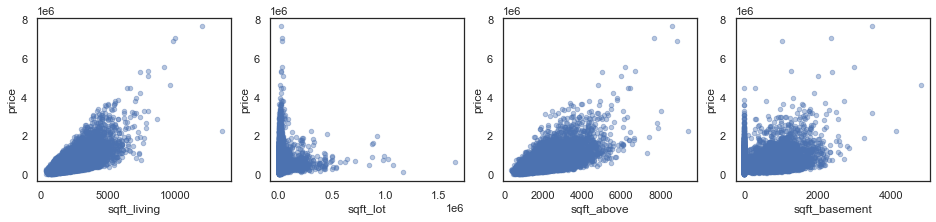

In [342]:
inspect = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


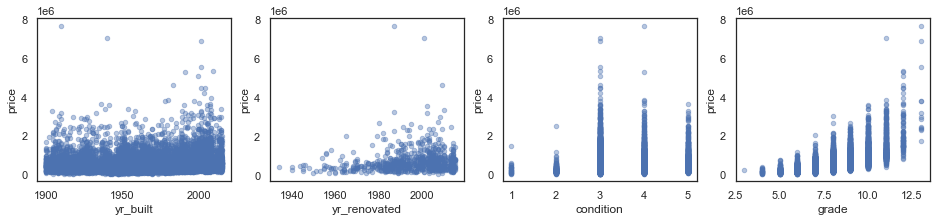

In [343]:
inspect = ['yr_built', 'yr_renovated', 'condition', 'grade']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


## Pairplots

In [344]:
continuous_var

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

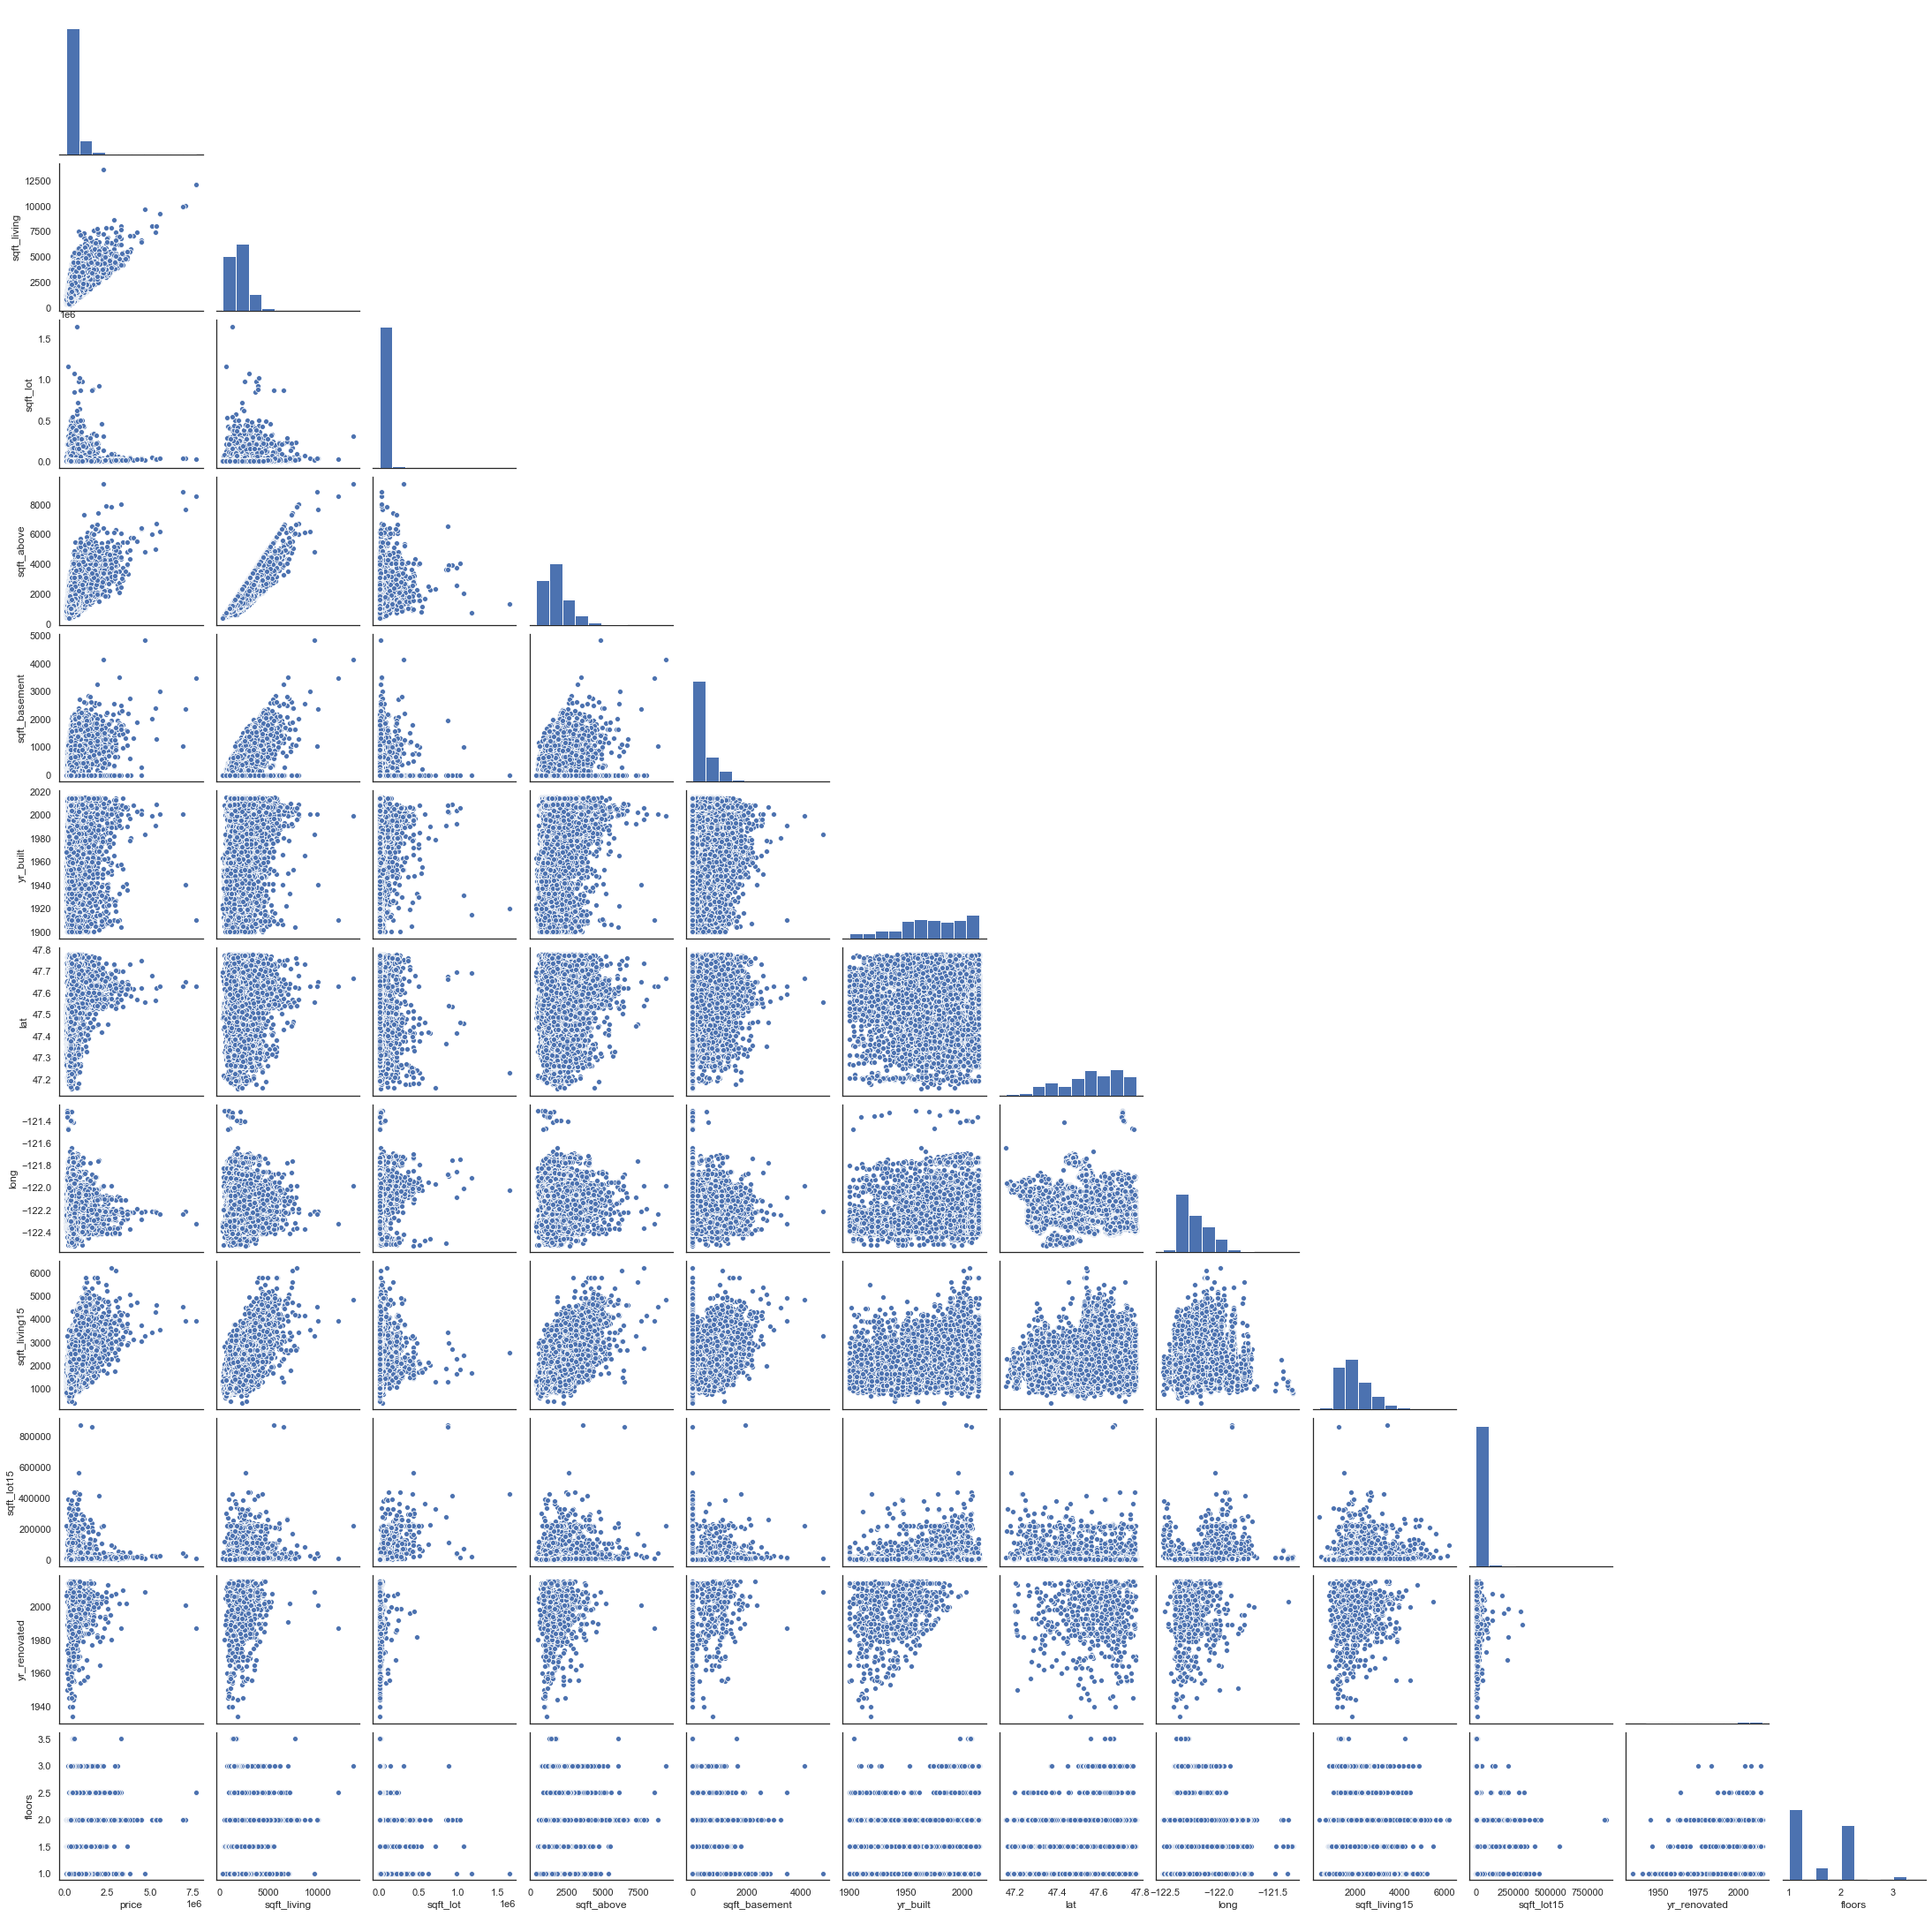

In [345]:
scope = df[continuous_var]
sns.pairplot(scope,corner=True, diag_kind = "hist");

In [346]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.264306 -0.002127   0.063629     0.104637  0.021459  0.020797   
view           0.393497  0.078354   0.186016     0.281715  0.075054  0.028414   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.325008  0.302683   0.282693     0.434576  0.015533 -0.245144   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated   0.125499  0.156142   0.253306     0.132791 -0.082031  0.059870   
zipcode       -0.053402 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat            0.306692 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.022036  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.082845  0.030690   0.088303     0.184342  0.718204 -0.010722   

               waterfront      view  condition     grade  sqft_above  \
price            0.264306  0.393497   0.036056  0.667951    0.605368   
bedrooms        -0.002127  0.078354   0.026496  0.356563    0.479386   
bathrooms        0.063629  0.186016  -0.126479  0.665838    0.686668   
sqft_living      0.104637  0.281715  -0.059445  0.762779    0.876448   
sqft_lot         0.021459  0.075054  -0.008830  0.114731    0.184139   
floors           0.020797  0.028414  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.380543   0.016648  0.082818    0.071778   
view             0.380543  1.000000   0.045622  0.249082    0.166017   
condition        0.016648  0.045622   1.000000 -0.146896   -0.158904   
grade            0.082818  0.249082  -0.146896  1.000000    0.756073   
sqft_above       0.071778  0.166017  -0.158904  0.756073    1.000000   
sqft_basement    0.084949  0.275440   0.170972  0.168023   -0.052293   
yr_built        -0.024487 -0.054452  -0.361592  0.447865    0.424037   
yr_renovated    -0.093519 -0.059121  -0.362244  0.242323    0.052690   
zipcode          0.028923  0.085059   0.002888 -0.185771   -0.261570   
lat             -0.012157  0.006321  -0.015102  0.113575   -0.001199   
long            -0.037628 -0.077702  -0.105877  0.200341    0.344842   
sqft_living15    0.083823  0.278928  -0.093072  0.713867    0.731767   
sqft_lot15       0.030658  0.073083  -0.003126  0.120981    0.195077   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.325008  0.053953      0.125499 -0.053402  0.306692   
bedrooms            0.302683  0.155670      0.156142 -0.154092 -0.009951   
bathrooms           0.282693  0.507173      0.253306 -0.204786  0.024280   
sqft_living         0.434576  0.318152      0.132791 -0.199802  0.052155   
sqft_lot            0.015533  0.052946     -0.082031 -0.129586 -0.085514   
floors             -0.245144  0.489193      0.059870 -0.059541  0.049239   
waterfront          0.084949 -0.024487     -0.093519  0.028923 -0.012157   
view                0.275440 -0.054452     -0.059121  0.085059  0.006321   
condition           0.170972 -0.361592     -0.362244  0.002888 -0.015102   
grade               0.168023  0.447865      0.242323 -0.185771  0.113575   
sqft_above         -0.052293  0.424037      0.052690 -0.261570 -0.001199   
sqft_basement       1.000000 -0.132844      

## Correlation Scatterplots

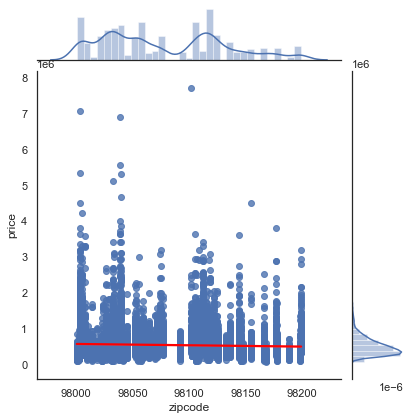

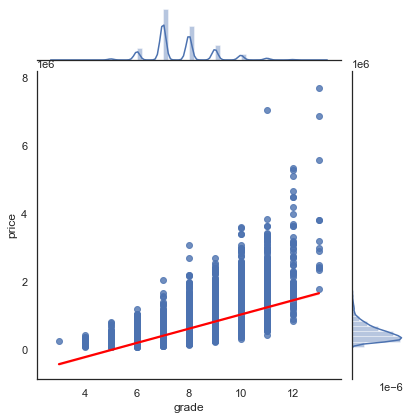

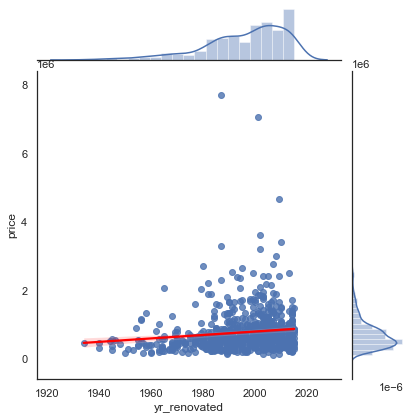

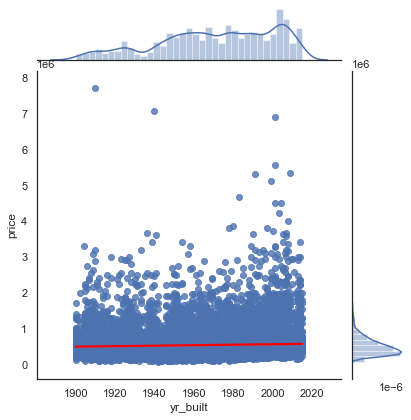

In [347]:
investigation_var = ['zipcode', 'grade', 'yr_renovated', 'yr_built']
for column_name in investigation_var:
        sns.jointplot(x=column_name, y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

# Feature Engneering

## `renovation_status` 
{0: no, 1:not within the last two years, 2:freshly}

<AxesSubplot:ylabel='Frequency'>

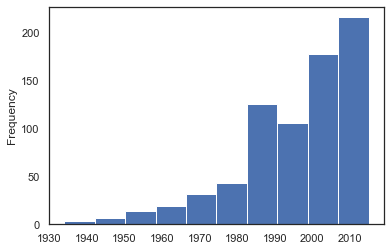

In [348]:
df.yr_renovated.plot(kind='hist')

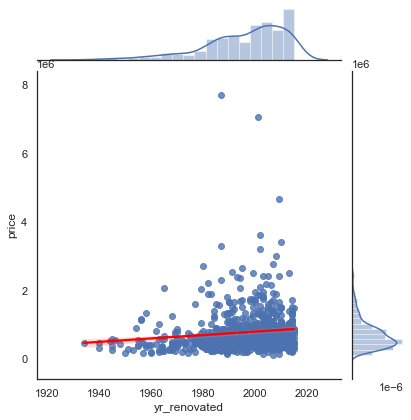

In [349]:
sns.jointplot(x='yr_renovated', y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

In [350]:

def renovation_status(row):
    if row['yr_renovated'] > 2012:
        return 2
    elif row['yr_renovated'] > 0: 
        return 1
    else: 
        return 0

df['renovation_status'] = df.apply(renovation_status, axis=1)

In [351]:
plt.scatter(x='renovation_status', y='price', data=df, alpha=0.4);

## `has basement`

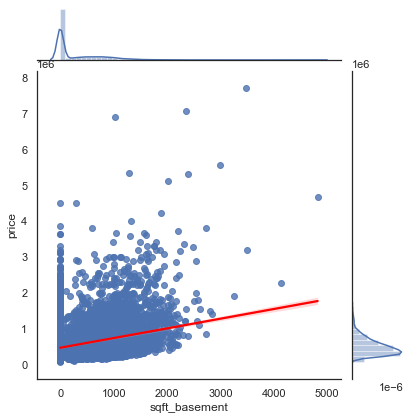

In [352]:
sns.jointplot(x='sqft_basement', y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

In [353]:
df['has_basement'] = df.sqft_basement.apply(lambda x: 1 if x > 0 else 0)

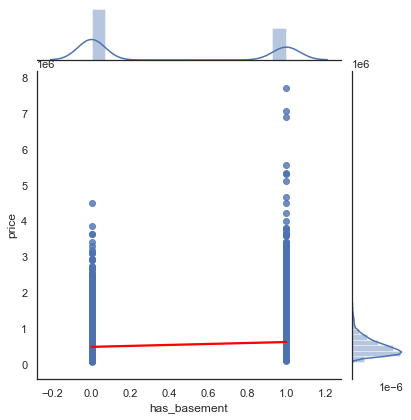

In [354]:
sns.jointplot(x='has_basement', y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

## set Category

In [356]:
def set_category(df, feature_list): 
    for feature in feature_list: 
        df[feature] = df[feature].astype('category')
    del feature_list

In [357]:
feature_list = ['condition', 'waterfront', 'renovation_status', 'view', 'has_basement']
set_category(df, feature_list)
del feature_list

## Set Dummies

In [358]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovation_status', 'has_basement'],
      dtype='object')

In [359]:
df2 = df
renovation_status_dummies = pd.get_dummies(df['renovation_status'], prefix='RenoSta', drop_first=True)
df2 = df2.drop(['renovation_status'], axis=1)
df2 = pd.concat([df, renovation_status_dummies], axis=1)
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovation_status', 'has_basement',
       'RenoSta_1', 'RenoSta_2'],
      dtype='object')

In [360]:
df = df2

# Predictive Modeling

In [572]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.stattools as sms

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from math import sqrt

In [355]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovation_status', 'has_basement'],
      dtype='object')

In [543]:
fetures_for_OLS = ['grade', 'bedrooms', 'bathrooms', 'zipcode', 'RenoSta_1', 'RenoSta_2', 'sqft_living15', 'sqft_lot15'] 


## OLS Linear Regression

In [552]:
pred = '+'.join(fetures_for_OLS)
formula = 'price~' + pred
formula

'price~grade+bedrooms+bathrooms+zipcode+RenoSta_1+RenoSta_2+sqft_living15+sqft_lot15'

In [545]:
ols_results = []
if len(ols_results) != 1:
    ols_results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
        
for feature in fetures_for_OLS:
    run_ols_regression(ols_results, df, 'price', feature)

In [546]:
ols_results = pd.DataFrame(ols_results)
ols_results = ols_results.set_index(list(ols_results)[0])
ols_results.columns = ols_results.iloc[0]
ols_results = ols_results.drop(ols_results.index[0])
ols_results

ind_var          r_squared    intercept        slope      p-value  \
0                                                                   
grade             0.446158 -1.06142e+06 -1.06142e+06            0   
bedrooms         0.0953497       127200       127200            0   
bathrooms         0.276577      8712.65      8712.65            0   
zipcode         0.00285182  3.64965e+07  3.64965e+07   4.0579e-15   
RenoSta_1        0.0134758       532929       532929  1.11417e-65   
RenoSta_2      0.000708694       539572       539572   9.1265e-05   
sqft_living15     0.342507     -83028.5     -83028.5            0   
sqft_lot15      0.00686328       526060       526060  3.30159e-34   

ind_var       normality (JB)  
0                             
grade             2.0439e+06  
bedrooms          1.1951e+06  
bathrooms             882736  
zipcode          1.12339e+06  
RenoSta_1        1.06537e+06  
RenoSta_2        1.13582e+06  
sqft_living15    1.91058e+06  
sqft_lot15       1.14233e+06

In [547]:
def run_ols_regression(store_results, data, target, feature):
    ols_results = []
    if len(ols_results) != 1:
        ols_results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
    
    formula = target + '~' + feature
    model = ols(formula=formula, data=data).fit()

    df = pd.DataFrame({feature: [data[feature].min(), data[feature].max()]})
    pred = model.predict(df)
    store_results.append([feature, model.rsquared, model.params[0], model.params[0],
                        model.pvalues[1], sms.jarque_bera(model.resid)[0]])

## Multiple Linear Regression

In [548]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [556]:
smf.ols(formula=formula, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2698.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:44:30   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21588   BIC:                         5.999e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.621e+07   3.41e+06    -22.319      0.000   -8.29e+07   -6.95e+07
grade          1.392e+05   2418.558     57.557      0.000    1.34e+05    1.44e+05
bedrooms       8077.3746   2257.425      3.578      0.000    3652.655    1.25e+04
bathrooms      5.092e+04   3389.264     15.023      0.000    4.43e+04    5.76e+04
zipcode         767.7608     34.804     22.059      0.000     699.542     835.980
RenoSta_1      2.106e+05   1.06e+04     19.930      0.000     1.9e+05    2.31e+05
RenoSta_2      1.314e+05    2.4e+04      5.465      0.000    8.43e+04    1.78e+05
sqft_living15   124.0702      3.895     31.856      0.000     116.436     131.704
sqft_lot15       -0.1032      0.066     -1.555      0.120      -0.233       0.027
==============================================================================
Omnibus:                    19958.328   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2128254.815
Skew:                           4.095   Prob(JB):                         0.00
Kurtosis:                      50.937   Cond. No.                     1.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred = '+'.join(fetures_for_OLS)
formula = 'price~' + pred
formula

## Final Regr Model

In [558]:
y = df['price']
X = df[fetures_for_OLS]

In [561]:
X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2698.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:46:12   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21588   BIC:                         5.999e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.621e+07   3.41e+06    -22.319      0.000   -8.29e+07   -6.95e+07
grade          1.392e+05   2418.558     57.557      0.000    1.34e+05    1.44e+05
bedrooms       8077.3746   2257.425      3.578      0.000    3652.655    1.25e+04
bathrooms      5.092e+04   3389.264     15.023      0.000    4.43e+04    5.76e+04
zipcode         767.7608     34.804     22.059      0.000     699.542     835.980
RenoSta_1      2.106e+05   1.06e+04     19.930      0.000     1.9e+05    2.31e+05
RenoSta_2      1.314e+05    2.4e+04      5.465      0.000    8.43e+04    1.78e+05
sqft_living15   124.0702      3.895     31.856      0.000     116.436     131.704
sqft_lot15       -0.1032      0.066     -1.555      0.120      -0.233       0.027
==============================================================================
Omnibus:                    19958.328   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2128254.815
Skew:                           4.095   Prob(JB):                         0.00
Kurtosis:                      50.937   Cond. No.                     1.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data Splitting

In [587]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


## Fitting the model to the training data

In [582]:
linreg = LinearRegression().fit(X_train, y_train)

## Testing the Fitted Model

In [580]:
# Calc preditors on the train and test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
print('y_hat_train: ', y_hat_train)
print()
print('y_hat_test: ', y_hat_test)

y_hat_train:  [408075.4131237  309030.79451655 913681.09696889 ... 165797.58767499
  41551.12301597 667171.84659822]

y_hat_test:  [138248.82690786 211625.46678329 431275.93164313 ... 433309.11320436
 407245.47233424 327020.22322664]


In [585]:
# Calc residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
print('Train test_residuals:', test_residuals)
print()
print('Test test_residuals:', test_residuals)

Train test_residuals: id
6303401050      5748.826908
1995200200   -203374.533217
1423089118    -62724.068357
9349900110      7239.094437
455000395    -244334.925084
2770600841     49108.663635
2817100900    -84769.473944
1224049095   -101404.428092
3019300050    -65133.167289
4299700095    152201.697282
1568100295      2822.518841
2788400315    135607.286943
5071401000     64928.038178
2131701020    -21103.387977
2436700625    -42837.254113
2978800120    101930.579533
3832050130    209352.005102
4139900050     28497.452871
6909200355    -98392.637650
853600020     239705.817135
7504101280    350967.661237
7749500070    266930.439800
395300100    -143492.502470
7533800325   -444216.604144
5456000570    -18734.640374
7831800395     15233.133650
2722059075    168504.459838
8732020720    258440.375844
3975400190    -86301.565559
3575305362     20460.583570
                  ...      
2938100010     67155.201117
6802210330    106855.727469
6384500581   -160718.119947
2607730110    174731.00

## Calc RMSE (Root Mean Squared Error)

In [586]:
train_mse = sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error:', train_mse)
print('Test Root Mean Squarred Error:', test_mse)

Train Root Mean Squarred Error: 259866.59104926375
Test Root Mean Squarred Error: 259572.34174257415


# Data Visualisation

# Archiv